# Code to generate all figures on severe events used in the paper


In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
# setup all the imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import seaborn as sns
from extremeweatherbench import evaluate, calc, cases, defaults, inputs, metrics, regions, derived
sns.set_theme(style='whitegrid')
import shapely
from pathlib import Path
import multiprocessing
import xarray as xr
from matplotlib.lines import Line2D

# make the basepath - change this to your local path
basepath = Path.home() / "extreme-weather-bench-paper" / ""
basepath = str(basepath) + "/"

import src.plots.paper_plotting as pp  # noqa: E402


In [3]:
# make a global color palatte so things are consistent across plots
sns_palette = sns.color_palette("tab10")
sns.set_style("whitegrid")

accessible_colors = [
    "#3394D6",  # blue
    "#E09000",  #  orange "#E69F00",  # orange
    "#A15A7E",  # "#CC79A7",  # reddish purple
    "#CC4A4A",  #  vermillion"#D55E00",  # vermillion
    "#A0A0A0",  # Grey "#000000",  # black
    "#B2B24D",  # Olive
    "#33B890",  # bluish green
    "#78C6F1",  # sky blue
    "#F0E442",  # yellow
]

# defaults for plotting
fourv2_style = {'color': accessible_colors[0]}
gc_style = {'color': accessible_colors[2]}
pangu_style = {'color': accessible_colors[3]}
hres_style = {'color': 'black'}

# the group styles and settings so that we can just easily grab them for the plots and they are globally consistent

ghcn_group_style = {'linestyle':'-', 'marker':'o', 'group':'GHCN'}
era5_group_style = {'linestyle':'--', 'marker':'s', 'group':'ERA5'}

ifs_group_style = {'linestyle':'-', 'marker':'o', 'group':'IFS'}
gfs_group_style = {'linestyle':':', 'marker':'d', 'group':'GFS'}

global_group_style = {'linestyle':'--', 'marker':'*', 'group':'Global'}

hres_group_style = {'linestyle':'-', 'marker':'.', 'group':'HRES'}

# settings for the different models
fourv2_ifs_cira_settings = {'forecast_source':'CIRA FOURv2 IFS', 'label_str': 'ForecastNet V2'} 
fourv2_gfs_cira_settings = {'forecast_source':'CIRA FOURv2 GFS', 'label_str': 'ForecastNet V2'} 
gc_ifs_cira_settings = {'forecast_source':'CIRA GC IFS', 'label_str': 'GraphCast'} 
gc_gfs_cira_settings = {'forecast_source':'CIRA GC GFS', 'label_str': 'GraphCast'} 
pangu_ifs_cira_settings = {'forecast_source':'CIRA PANG IFS', 'label_str': 'Pangu Weather'} 
pangu_gfs_cira_settings = {'forecast_source':'CIRA PANG GFS', 'label_str': 'Pangu Weather'} 

hres_ifs_settings = {'forecast_source':'ECMWF HRES', 'label_str': 'HRES'} 



In [5]:
# load in all of the events in the yaml file
print("loading in the events yaml file")
ewb_cases = cases.load_ewb_events_yaml_into_case_collection()
# build out all of the expected data to evalate the case
# this will not be a 1-1 mapping with ewb_cases because there are multiple data sources
# to evaluate for some cases
# for example, a heat/cold case will have both a case operator for ERA-5 data and GHCN
case_operators = cases.build_case_operators(
    ewb_cases, defaults.get_brightband_evaluation_objects()
)


loading in the events yaml file


# you can either load in your results from scratch or you can load them from a saved pickle file (much faster)

In [16]:
# load the results back in
fourv2_severe_results = pd.read_pickle(basepath + 'saved_data/fourv2_severe_results.pkl')
pang_severe_results = pd.read_pickle(basepath + 'saved_data/pang_severe_results.pkl')
hres_severe_results = pd.read_pickle(basepath + 'saved_data/hres_severe_results.pkl')
gc_severe_results = pd.read_pickle(basepath + 'saved_data/gc_severe_results.pkl')


# plotting and subsetting code at the global level

In [17]:
# setup the plot settings
severe_tp_settings = {'linestyle':'-', 'marker':'o', 'group':'True Positives'}
severe_fn_settings = {'linestyle':'--', 'marker':'x', 'group':'False Negatives'}

fourv2_gfs_era5_settings_tp = fourv2_gfs_cira_settings | fourv2_style | severe_tp_settings 
gc_gfs_era5_settings_tp  = gc_gfs_cira_settings | gc_style | severe_tp_settings 
pangu_gfs_era5_settings_tp = pangu_gfs_cira_settings | pangu_style | severe_tp_settings 
hres_era5_settings_tp = hres_ifs_settings | hres_style | severe_tp_settings 

# grab the severe results
fourv2_severe_plot_tp = pp.subset_results_to_xarray(results_df=fourv2_severe_results, 
    forecast_source=fourv2_gfs_cira_settings['forecast_source'], 
    target_source='local_storm_reports', metric='TruePositives', init_time='zeroz')
gc_severe_plot_tp = pp.subset_results_to_xarray(results_df=gc_severe_results, 
    forecast_source=gc_gfs_cira_settings['forecast_source'], 
    target_source='local_storm_reports', metric='TruePositives', init_time='zeroz')
pangu_severe_plot_tp  = pp.subset_results_to_xarray(results_df=pang_severe_results, 
    forecast_source=pangu_gfs_cira_settings['forecast_source'], 
    target_source='local_storm_reports', metric='TruePositives', init_time='zeroz')
hres_severe_plot_tp = pp.subset_results_to_xarray(results_df=hres_severe_results, 
    forecast_source=hres_ifs_settings['forecast_source'], 
    target_source='local_storm_reports', metric='TruePositives', init_time='zeroz')

# plot the results
severe_data_tp = [fourv2_severe_plot_tp, gc_severe_plot_tp, pangu_severe_plot_tp, hres_severe_plot_tp]
severe_settings_tp = [fourv2_gfs_era5_settings_tp, gc_gfs_era5_settings_tp, 
    pangu_gfs_era5_settings_tp, hres_era5_settings_tp]


fourv2_gfs_era5_settings_fn = fourv2_gfs_cira_settings | fourv2_style | severe_fn_settings 
gc_gfs_era5_settings_fn  = gc_gfs_cira_settings | gc_style | severe_fn_settings 
pangu_gfs_era5_settings_fn = pangu_gfs_cira_settings | pangu_style | severe_fn_settings 
hres_era5_settings_fn = hres_ifs_settings | hres_style | severe_fn_settings 

# grab the results for the false negatives
fourv2_severe_plot_fn = pp.subset_results_to_xarray(results_df=fourv2_severe_results, 
    forecast_source=fourv2_gfs_cira_settings['forecast_source'], 
    target_source='local_storm_reports', metric='FalseNegatives', init_time='zeroz')
gc_severe_plot_fn = pp.subset_results_to_xarray(results_df=gc_severe_results, 
    forecast_source=gc_gfs_cira_settings['forecast_source'], 
    target_source='local_storm_reports', metric='FalseNegatives', init_time='zeroz')
pangu_severe_plot_fn = pp.subset_results_to_xarray(results_df=pang_severe_results, 
    forecast_source=pangu_gfs_cira_settings['forecast_source'], 
    target_source='local_storm_reports', metric='FalseNegatives', init_time='zeroz')
hres_severe_plot_fn = pp.subset_results_to_xarray(results_df=hres_severe_results, 
    forecast_source=hres_ifs_settings['forecast_source'], 
    target_source='local_storm_reports', metric='FalseNegatives', init_time='zeroz')

# plot the results
severe_data_fn = [fourv2_severe_plot_fn, gc_severe_plot_fn, pangu_severe_plot_fn, hres_severe_plot_fn]
severe_settings_fn = [fourv2_gfs_era5_settings_fn, gc_gfs_era5_settings_fn, 
    pangu_gfs_era5_settings_fn, hres_era5_settings_fn]

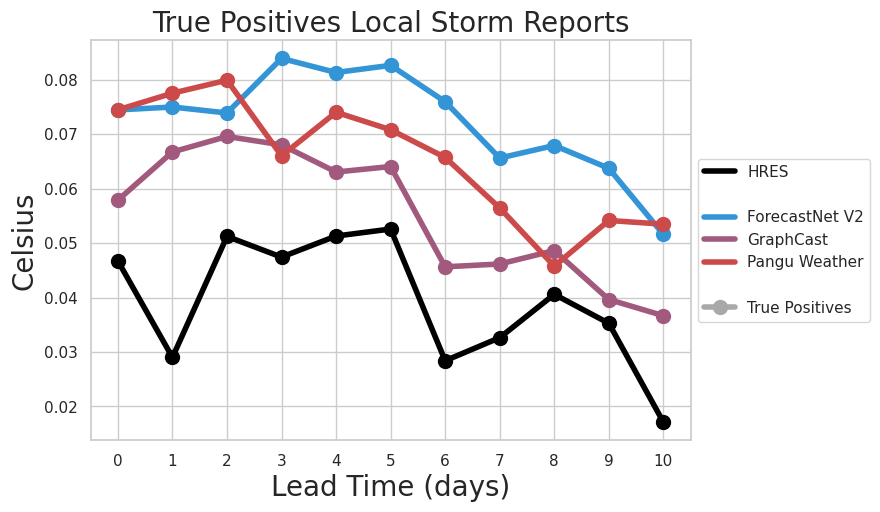

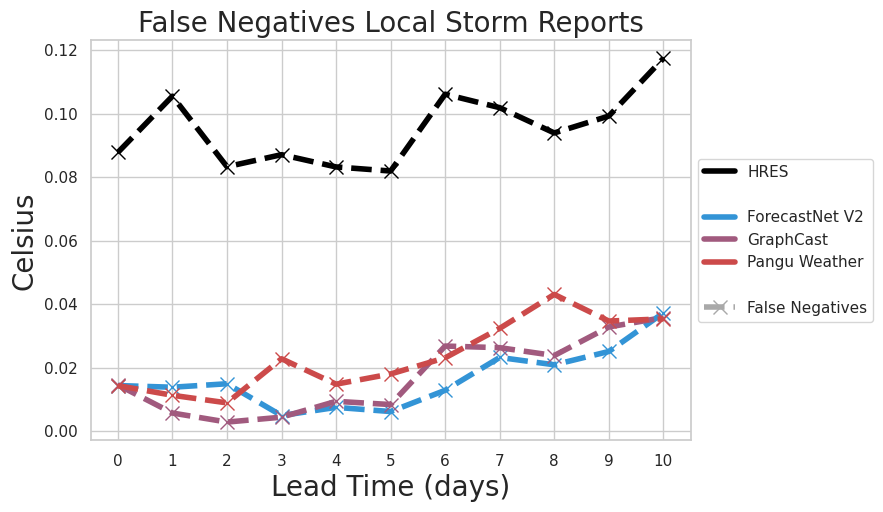

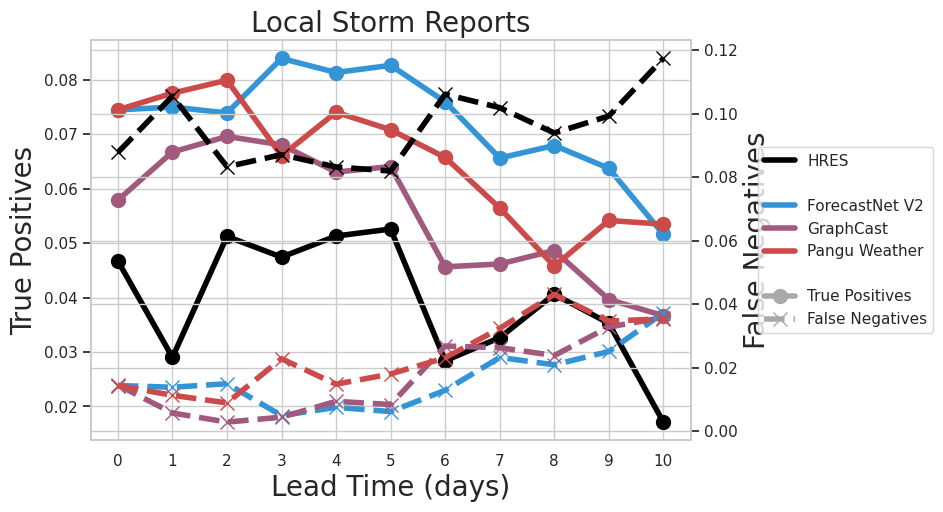

In [18]:
pp.plot_results_by_metric(data=severe_data_tp, settings=severe_settings_tp, 
    title='True Positives Local Storm Reports', show_all_in_legend=False)
pp.plot_results_by_metric(data=severe_data_fn, settings=severe_settings_fn, 
    title='False Negatives Local Storm Reports', show_all_in_legend=False)
pp.plot_two_results_by_metric(data1=severe_data_tp, data2=severe_data_fn, 
    settings1=severe_settings_tp, settings2=severe_settings_fn, 
    y_label1='True Positives', y_label2='False Negatives',
    title='Local Storm Reports', show_all_in_legend=False)


In [11]:
fourv2_severe_results['metric'].unique()


In [19]:
severe_settings = {'linestyle':'-', 'marker':'o', 'group':'PPH'}

fourv2_gfs_era5_settings_csi = fourv2_gfs_cira_settings | fourv2_style | severe_settings 
gc_gfs_era5_settings_csi  = gc_gfs_cira_settings | gc_style | severe_settings 
pangu_gfs_era5_settings_csi = pangu_gfs_cira_settings | pangu_style | severe_settings 
hres_era5_settings_csi = hres_ifs_settings | hres_style | severe_settings 

# grab the severe CSI results
fourv2_severe_plot_csi = pp.subset_results_to_xarray(results_df=fourv2_severe_results, 
    forecast_source=fourv2_gfs_cira_settings['forecast_source'], 
    target_source='practically_perfect_hindcast', metric='CriticalSuccessIndex', init_time='zeroz')
gc_severe_plot_csi = pp.subset_results_to_xarray(results_df=gc_severe_results, 
    forecast_source=gc_gfs_cira_settings['forecast_source'], 
    target_source='practically_perfect_hindcast', metric='CriticalSuccessIndex', init_time='zeroz')
pangu_severe_plot_csi  = pp.subset_results_to_xarray(results_df=pang_severe_results, 
    forecast_source=pangu_gfs_cira_settings['forecast_source'], 
    target_source='practically_perfect_hindcast', metric='CriticalSuccessIndex', init_time='zeroz')
hres_severe_plot_csi = pp.subset_results_to_xarray(results_df=hres_severe_results, 
    forecast_source=hres_ifs_settings['forecast_source'], 
    target_source='practically_perfect_hindcast', metric='CriticalSuccessIndex', init_time='zeroz')

# plot the results
severe_data_csi = [fourv2_severe_plot_csi, gc_severe_plot_csi, pangu_severe_plot_csi, hres_severe_plot_csi]
severe_settings_general = [fourv2_gfs_era5_settings_csi, gc_gfs_era5_settings_csi, 
    pangu_gfs_era5_settings_csi, hres_era5_settings_csi]


# grab the results for the FalseAlarmRatio
fourv2_severe_plot_far = pp.subset_results_to_xarray(results_df=fourv2_severe_results, 
    forecast_source=fourv2_gfs_cira_settings['forecast_source'], 
    target_source='practically_perfect_hindcast', metric='FalseAlarmRatio', init_time='zeroz')
gc_severe_plot_far = pp.subset_results_to_xarray(results_df=gc_severe_results, 
    forecast_source=gc_gfs_cira_settings['forecast_source'], 
    target_source='practically_perfect_hindcast', metric='FalseAlarmRatio', init_time='zeroz')
pangu_severe_plot_far = pp.subset_results_to_xarray(results_df=pang_severe_results, 
    forecast_source=pangu_gfs_cira_settings['forecast_source'], 
    target_source='practically_perfect_hindcast', metric='FalseAlarmRatio', init_time='zeroz')
hres_severe_plot_far = pp.subset_results_to_xarray(results_df=hres_severe_results, 
    forecast_source=hres_ifs_settings['forecast_source'], 
    target_source='practically_perfect_hindcast', metric='FalseAlarmRatio', init_time='zeroz')

# plot the results
severe_data_far = [fourv2_severe_plot_far, gc_severe_plot_far, pangu_severe_plot_far, hres_severe_plot_far]


# grab the results for EarlySignal
fourv2_severe_plot_es = pp.subset_results_to_xarray(results_df=fourv2_severe_results, 
    forecast_source=fourv2_gfs_cira_settings['forecast_source'], 
    target_source='practically_perfect_hindcast', metric='EarlySignal', init_time='zeroz')
gc_severe_plot_es = pp.subset_results_to_xarray(results_df=gc_severe_results, 
    forecast_source=gc_gfs_cira_settings['forecast_source'], 
    target_source='practically_perfect_hindcast', metric='EarlySignal', init_time='zeroz')
pangu_severe_plot_es = pp.subset_results_to_xarray(results_df=pang_severe_results, 
    forecast_source=pangu_gfs_cira_settings['forecast_source'], 
    target_source='practically_perfect_hindcast', metric='EarlySignal', init_time='zeroz')
hres_severe_plot_es = pp.subset_results_to_xarray(results_df=hres_severe_results, 
    forecast_source=hres_ifs_settings['forecast_source'], 
    target_source='practically_perfect_hindcast', metric='EarlySignal', init_time='zeroz')

# make the results for the plot
severe_data_es = [fourv2_severe_plot_es, gc_severe_plot_es, pangu_severe_plot_es, hres_severe_plot_es]

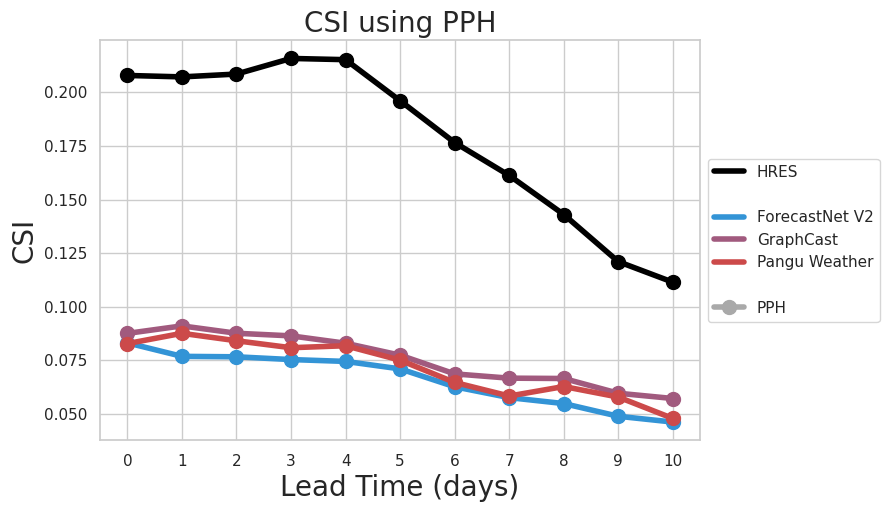

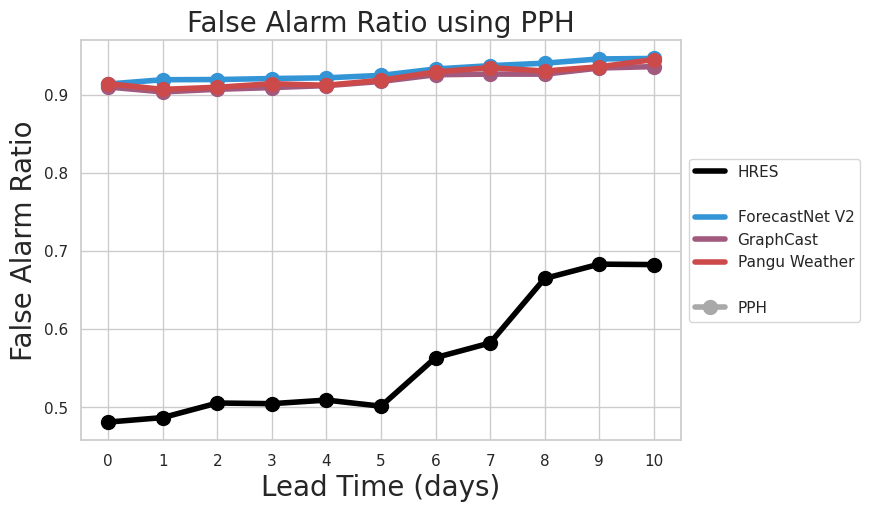

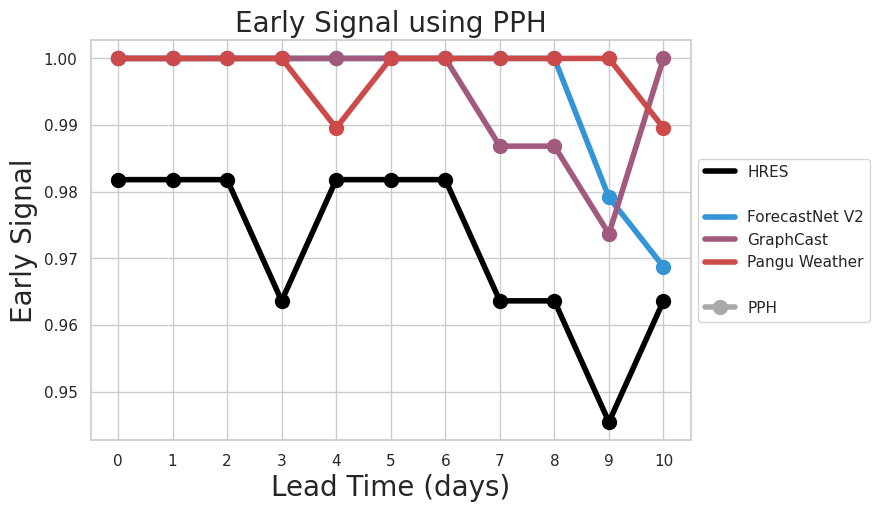

In [20]:
pp.plot_results_by_metric(data=severe_data_csi, settings=severe_settings_general, 
    title='CSI using PPH', show_all_in_legend=False, y_label='CSI')
pp.plot_results_by_metric(data=severe_data_far, settings=severe_settings_general, 
    title='False Alarm Ratio using PPH', show_all_in_legend=False, y_label='False Alarm Ratio')
pp.plot_results_by_metric(data=severe_data_es, settings=severe_settings_general, 
    title='Early Signal using PPH', show_all_in_legend=False, y_label='Early Signal')


# analysis at the regional level

North America Cases: [1, 2, 3, 4, 5, 6, 27, 30, 31, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 84, 87, 88, 89, 95, 96, 97, 101, 102, 103, 104, 105, 106, 109, 110, 111, 112, 113, 114, 115, 118, 119, 121, 124, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 170, 172, 173, 174, 175, 176, 177, 178, 179, 180, 194, 195, 196, 197, 198, 199, 200, 201, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337]
Australia Ca

/home/amy/extreme-weather-bench-paper/src/plots/paper_plotting.py:698: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower left", fontsize=12)


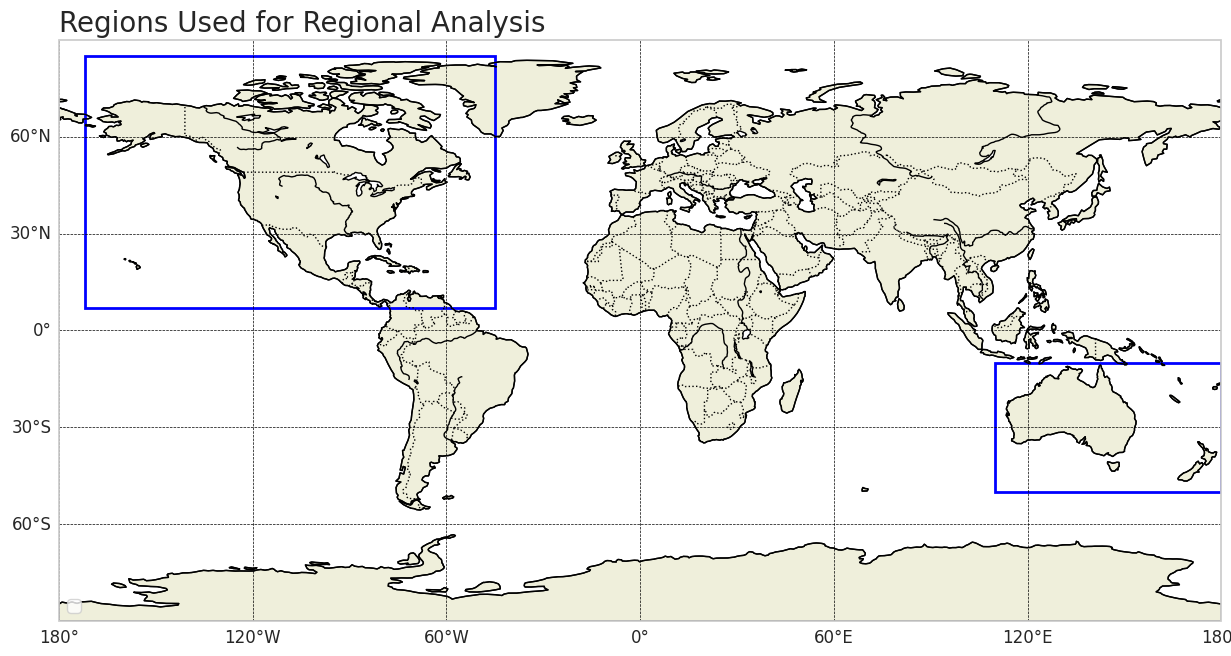

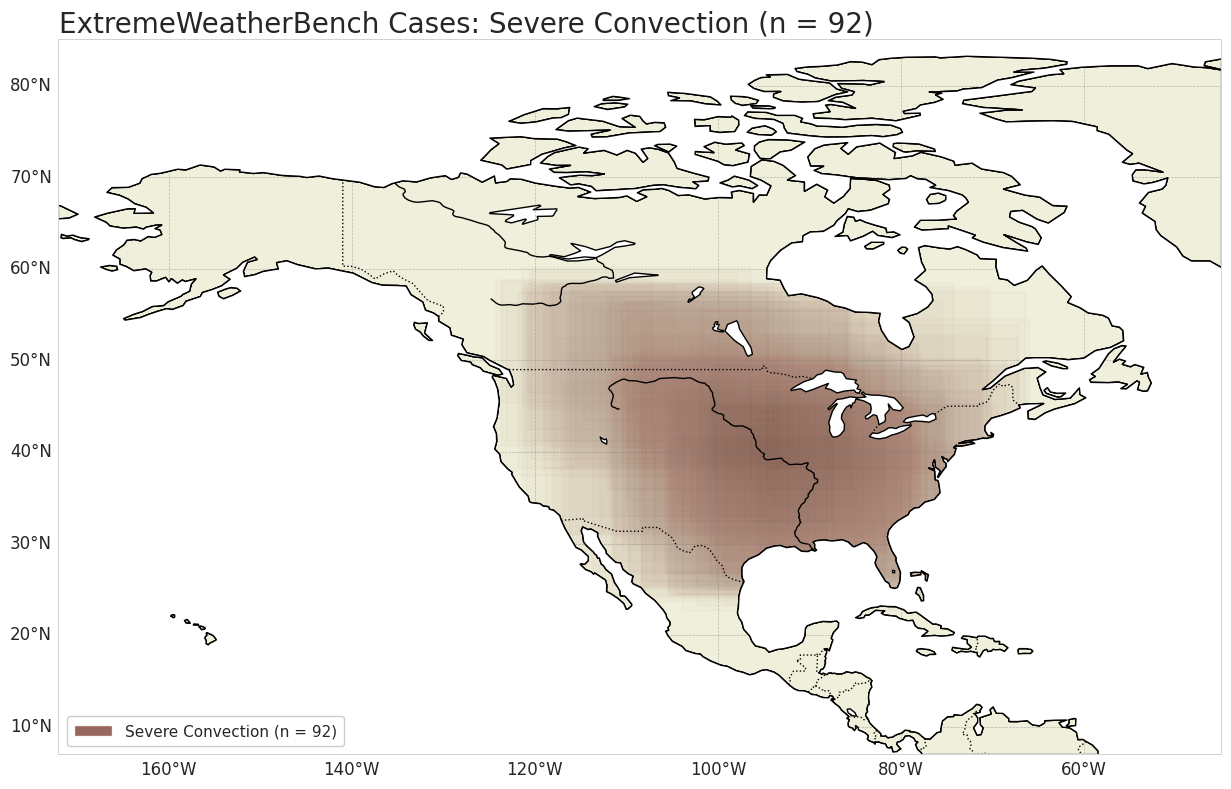

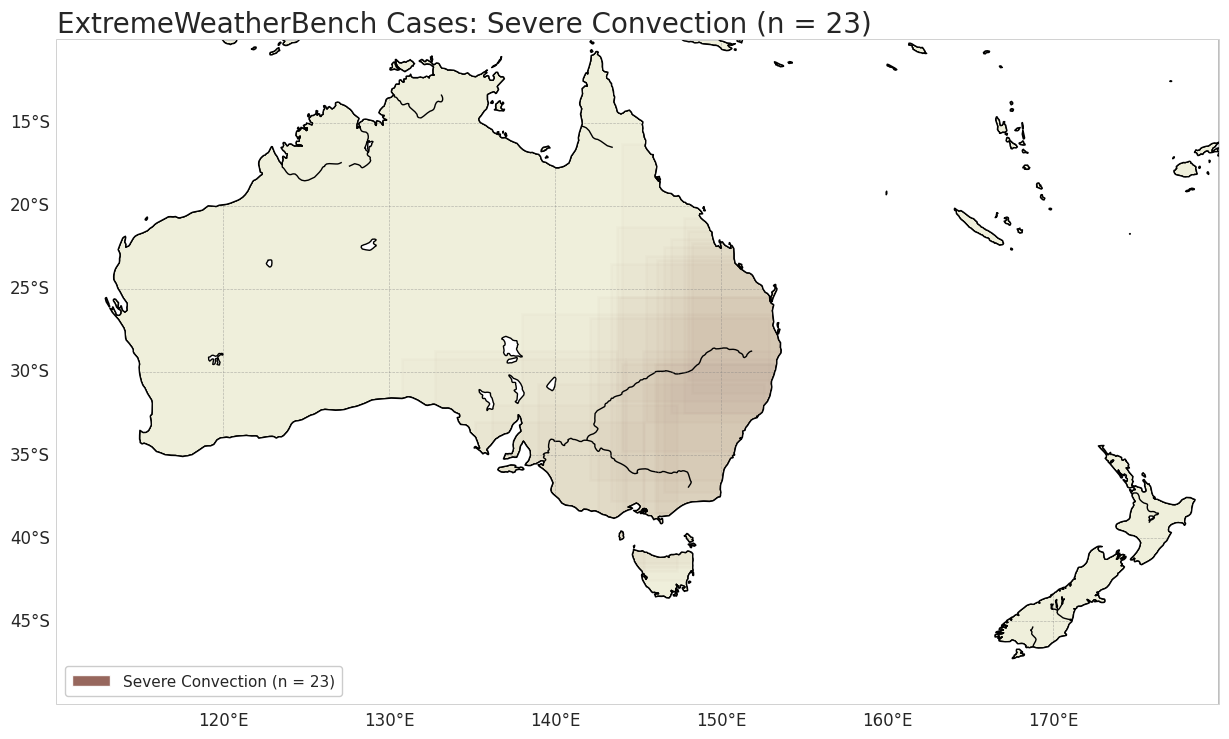

In [ ]:
# make the bounding boxes for the regions

# North America
na_bounding_box = [-172, -45, 7, 85]
na_bounding_box_polygon = pp.get_polygon_from_bounding_box(na_bounding_box)
na_bounding_region = regions.BoundingBoxRegion(latitude_min=7, latitude_max=85, longitude_min=-172, longitude_max=-45)

# australia bounding box
au_bounding_box = [110, 180, -50, -10]
au_bounding_box_polygon = pp.get_polygon_from_bounding_box(au_bounding_box)
au_bounding_region = regions.BoundingBoxRegion(latitude_min=-50, latitude_max=-10, longitude_min=110, longitude_max=180)

# break the cases into different lists
na_subset = regions.RegionSubsetter(region=na_bounding_region, method='intersects').subset_case_collection(ewb_cases)
au_subset = regions.RegionSubsetter(region=au_bounding_region, method='intersects').subset_case_collection(ewb_cases)

na_case_ids = [n.case_id_number for n in na_subset.cases]
au_case_ids = [n.case_id_number for n in au_subset.cases]

print(f'North America Cases: {na_case_ids}')
print(f'Australia Cases: {au_case_ids}')


In [ ]:
# plot the regions
pp.plot_boxes(
    box_list=[na_bounding_box_polygon, au_bounding_box_polygon],
    box_names=['North America', 'Europe', 'Australia'],
    title='Regions Used for Regional Analysis',
)

# plot North America cases
pp.plot_all_cases(ewb_cases, event_type='severe_convection', bounding_box=na_bounding_box, 
    fill_boxes=True)

pp.plot_all_cases(ewb_cases, event_type='severe_convection', bounding_box=au_bounding_box, 
    fill_boxes=True)

In [22]:
# create a group style for the local/global plots
na_group_style = {'linestyle':'-', 'marker':'h', 'group':'North America'}
au_group_style = {'linestyle':'-', 'marker':'h', 'group':'Australia'}

# plot the results for one metric for the three AI models versus HRES
na_fourv2_gfs_settings = fourv2_gfs_cira_settings | fourv2_style | na_group_style
na_gc_gfs_settings = gc_gfs_cira_settings | gc_style | na_group_style
na_pangu_gfs_settings = pangu_gfs_cira_settings | pangu_style | na_group_style
na_hres_settings = hres_ifs_settings | hres_style | na_group_style

au_fourv2_gfs_settings = fourv2_gfs_cira_settings | fourv2_style | au_group_style
au_gc_gfs_settings = gc_gfs_cira_settings | gc_style | au_group_style
au_pangu_gfs_settings = pangu_gfs_cira_settings | pangu_style | au_group_style
au_hres_settings = hres_ifs_settings | hres_style | au_group_style

# subset the data for the plots
na_fourv2_severe_plot_tp = pp.subset_results_to_xarray(results_df=fourv2_severe_results, 
    forecast_source=fourv2_gfs_cira_settings['forecast_source'], 
    target_source='local_storm_reports', metric='TruePositives', init_time='zeroz',
    case_id_list=na_case_ids)
na_gc_severe_plot_tp = pp.subset_results_to_xarray(results_df=gc_severe_results, 
    forecast_source=gc_gfs_cira_settings['forecast_source'], 
    target_source='local_storm_reports', metric='TruePositives', init_time='zeroz',
    case_id_list=na_case_ids)
na_pangu_severe_plot_tp  = pp.subset_results_to_xarray(results_df=pang_severe_results, 
    forecast_source=pangu_gfs_cira_settings['forecast_source'], 
    target_source='local_storm_reports', metric='TruePositives', init_time='zeroz',
    case_id_list=na_case_ids)
na_hres_severe_plot_tp = pp.subset_results_to_xarray(results_df=hres_severe_results, 
    forecast_source=hres_ifs_settings['forecast_source'], 
    target_source='local_storm_reports', metric='TruePositives', init_time='zeroz',
    case_id_list=na_case_ids)

# subset the data for the plots
au_fourv2_severe_plot_tp = pp.subset_results_to_xarray(results_df=fourv2_severe_results, 
    forecast_source=fourv2_gfs_cira_settings['forecast_source'], 
    target_source='local_storm_reports', metric='TruePositives', init_time='zeroz',
    case_id_list=au_case_ids)
au_gc_severe_plot_tp = pp.subset_results_to_xarray(results_df=gc_severe_results, 
    forecast_source=gc_gfs_cira_settings['forecast_source'], 
    target_source='local_storm_reports', metric='TruePositives', init_time='zeroz',
    case_id_list=au_case_ids)
au_pangu_severe_plot_tp  = pp.subset_results_to_xarray(results_df=pang_severe_results, 
    forecast_source=pangu_gfs_cira_settings['forecast_source'], 
    target_source='local_storm_reports', metric='TruePositives', init_time='zeroz',
    case_id_list=au_case_ids)
au_hres_severe_plot_tp = pp.subset_results_to_xarray(results_df=hres_severe_results, 
    forecast_source=hres_ifs_settings['forecast_source'], 
    target_source='local_storm_reports', metric='TruePositives', init_time='zeroz',
    case_id_list=au_case_ids)



# grab the results for the false negatives
na_fourv2_severe_plot_fn = pp.subset_results_to_xarray(results_df=fourv2_severe_results, 
    forecast_source=fourv2_gfs_cira_settings['forecast_source'], 
    target_source='local_storm_reports', metric='FalseNegatives', init_time='zeroz', 
    case_id_list=na_case_ids)
na_gc_severe_plot_fn = pp.subset_results_to_xarray(results_df=gc_severe_results, 
    forecast_source=gc_gfs_cira_settings['forecast_source'], 
    target_source='local_storm_reports', metric='FalseNegatives', init_time='zeroz', 
    case_id_list=na_case_ids)
na_pangu_severe_plot_fn = pp.subset_results_to_xarray(results_df=pang_severe_results, 
    forecast_source=pangu_gfs_cira_settings['forecast_source'], 
    target_source='local_storm_reports', metric='FalseNegatives', init_time='zeroz', 
    case_id_list=na_case_ids)
na_hres_severe_plot_fn = pp.subset_results_to_xarray(results_df=hres_severe_results, 
    forecast_source=hres_ifs_settings['forecast_source'], 
    target_source='local_storm_reports', metric='FalseNegatives', init_time='zeroz', 
    case_id_list=na_case_ids)

au_fourv2_severe_plot_fn = pp.subset_results_to_xarray(results_df=fourv2_severe_results, 
    forecast_source=fourv2_gfs_cira_settings['forecast_source'], 
    target_source='local_storm_reports', metric='FalseNegatives', init_time='zeroz', 
    case_id_list=au_case_ids)
au_gc_severe_plot_fn = pp.subset_results_to_xarray(results_df=gc_severe_results, 
    forecast_source=gc_gfs_cira_settings['forecast_source'], 
    target_source='local_storm_reports', metric='FalseNegatives', init_time='zeroz', 
    case_id_list=au_case_ids)
au_pangu_severe_plot_fn = pp.subset_results_to_xarray(results_df=pang_severe_results, 
    forecast_source=pangu_gfs_cira_settings['forecast_source'], 
    target_source='local_storm_reports', metric='FalseNegatives', init_time='zeroz', 
    case_id_list=au_case_ids)
au_hres_severe_plot_fn = pp.subset_results_to_xarray(results_df=hres_severe_results, 
    forecast_source=hres_ifs_settings['forecast_source'], 
    target_source='local_storm_reports', metric='FalseNegatives', init_time='zeroz', 
    case_id_list=au_case_ids)



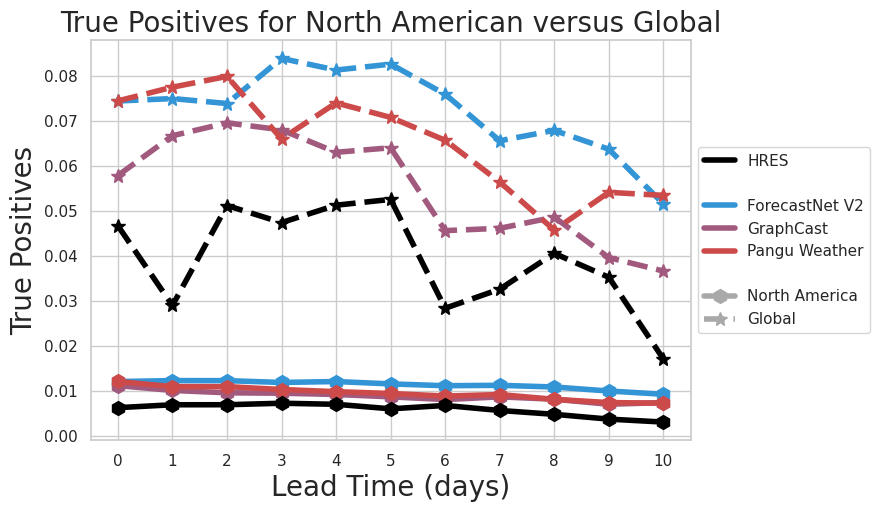

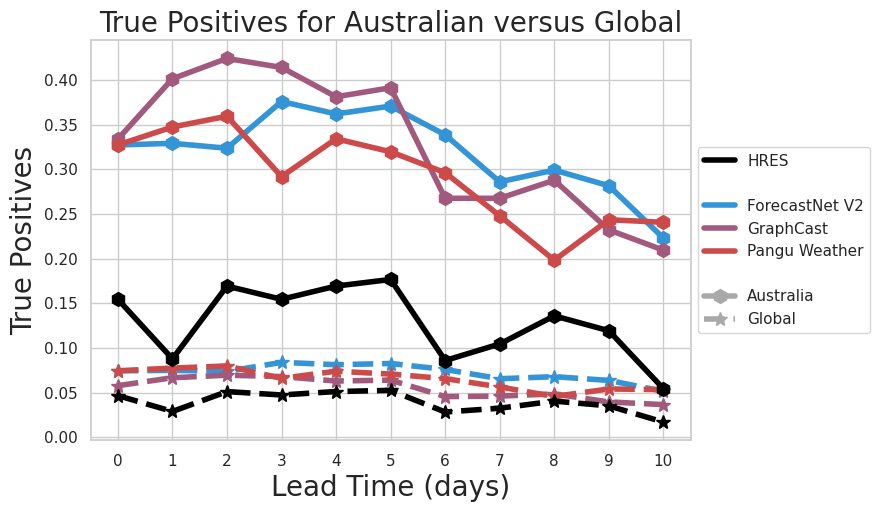

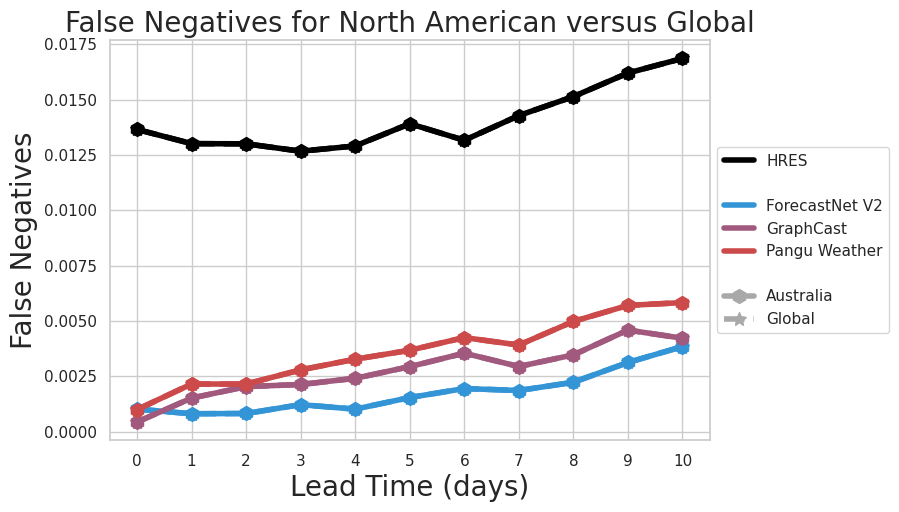

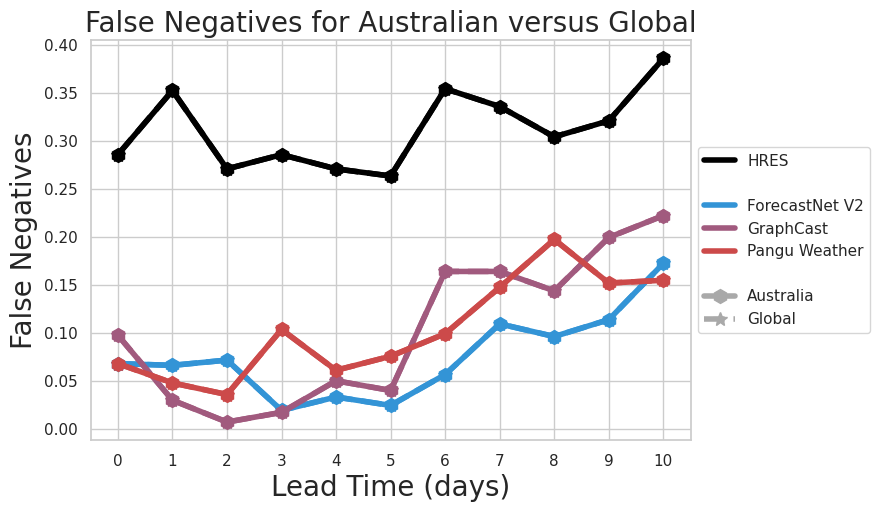

In [23]:
# make a global settings so we can compare
fourv2_global_settings = fourv2_gfs_cira_settings | fourv2_style | global_group_style
pangu_global_settings = pangu_gfs_cira_settings | pangu_style | global_group_style
gc_global_settings = gc_gfs_cira_settings | gc_style | global_group_style
hres_global_settings = hres_ifs_settings | hres_style | global_group_style 

# plot the results
na_data_tp = [na_fourv2_severe_plot_tp, fourv2_severe_plot_tp, na_gc_severe_plot_tp, 
    gc_severe_plot_tp, na_pangu_severe_plot_tp, pangu_severe_plot_tp, na_hres_severe_plot_tp, hres_severe_plot_tp]
settings = [na_fourv2_gfs_settings, fourv2_global_settings, na_gc_gfs_settings, gc_global_settings, 
    na_pangu_gfs_settings, pangu_global_settings, na_hres_settings, hres_global_settings]
pp.plot_results_by_metric(data=na_data_tp, settings=settings, 
    title='True Positives for North American versus Global', y_label='True Positives')

au_data_tp = [au_fourv2_severe_plot_tp, fourv2_severe_plot_tp, au_gc_severe_plot_tp, gc_severe_plot_tp, 
    au_pangu_severe_plot_tp, pangu_severe_plot_tp, au_hres_severe_plot_tp, hres_severe_plot_tp]
settings = [au_fourv2_gfs_settings, fourv2_global_settings, au_gc_gfs_settings, gc_global_settings, 
    au_pangu_gfs_settings, pangu_global_settings, au_hres_settings, hres_global_settings]
pp.plot_results_by_metric(data=au_data_tp, settings=settings, 
    title='True Positives for Australian versus Global', y_label='True Positives')

na_data_fn = [na_fourv2_severe_plot_fn, na_fourv2_severe_plot_fn, na_gc_severe_plot_fn, na_gc_severe_plot_fn, 
    na_pangu_severe_plot_fn, na_pangu_severe_plot_fn, na_hres_severe_plot_fn, na_hres_severe_plot_fn]
pp.plot_results_by_metric(data=na_data_fn, settings=settings, 
    title='False Negatives for North American versus Global', y_label='False Negatives')

au_data_fn = [au_fourv2_severe_plot_fn, au_fourv2_severe_plot_fn, au_gc_severe_plot_fn, au_gc_severe_plot_fn, 
    au_pangu_severe_plot_fn, au_pangu_severe_plot_fn, au_hres_severe_plot_fn, au_hres_severe_plot_fn]
pp.plot_results_by_metric(data=au_data_fn, settings=settings, 
    title='False Negatives for Australian versus Global', y_label='False Negatives')




In [20]:
na_gc_severe_plot_tp["value"].mean("case_id_number")


In [21]:
au_gc_severe_plot_tp["value"]

In [43]:
gc_severe_plot_tp["value"].mean("case_id_number")

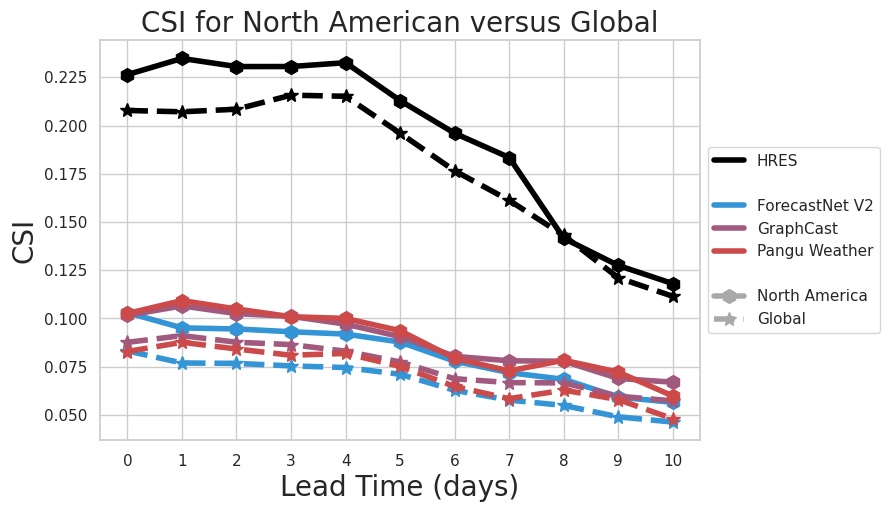

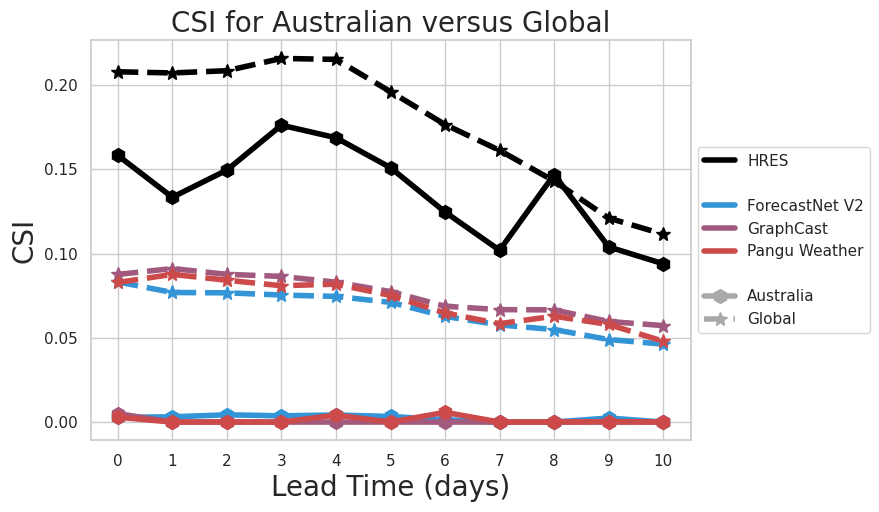

In [24]:
# create a group style for the local/global plots
na_group_style = {'linestyle':'-', 'marker':'h', 'group':'North America'}
au_group_style = {'linestyle':'-', 'marker':'h', 'group':'Australia'}

# plot the results for one metric for the three AI models versus HRES
na_fourv2_gfs_settings = fourv2_gfs_cira_settings | fourv2_style | na_group_style
na_gc_gfs_settings = gc_gfs_cira_settings | gc_style | na_group_style
na_pangu_gfs_settings = pangu_gfs_cira_settings | pangu_style | na_group_style
na_hres_settings = hres_ifs_settings | hres_style | na_group_style

au_fourv2_gfs_settings = fourv2_gfs_cira_settings | fourv2_style | au_group_style
au_gc_gfs_settings = gc_gfs_cira_settings | gc_style | au_group_style
au_pangu_gfs_settings = pangu_gfs_cira_settings | pangu_style | au_group_style
au_hres_settings = hres_ifs_settings | hres_style | au_group_style

# subset the data for the plots
na_fourv2_severe_plot_csi = pp.subset_results_to_xarray(results_df=fourv2_severe_results, 
    forecast_source=fourv2_gfs_cira_settings['forecast_source'], 
    target_source='practically_perfect_hindcast', metric='CriticalSuccessIndex', init_time='zeroz',
    case_id_list=na_case_ids)
na_gc_severe_plot_csi = pp.subset_results_to_xarray(results_df=gc_severe_results, 
    forecast_source=gc_gfs_cira_settings['forecast_source'], 
    target_source='practically_perfect_hindcast', metric='CriticalSuccessIndex', init_time='zeroz',
    case_id_list=na_case_ids)
na_pangu_severe_plot_csi  = pp.subset_results_to_xarray(results_df=pang_severe_results, 
    forecast_source=pangu_gfs_cira_settings['forecast_source'], 
    target_source='practically_perfect_hindcast', metric='CriticalSuccessIndex', init_time='zeroz',
    case_id_list=na_case_ids)
na_hres_severe_plot_csi = pp.subset_results_to_xarray(results_df=hres_severe_results, 
    forecast_source=hres_ifs_settings['forecast_source'], 
    target_source='practically_perfect_hindcast', metric='CriticalSuccessIndex', init_time='zeroz',
    case_id_list=na_case_ids)

# subset the data for the plots
au_fourv2_severe_plot_csi = pp.subset_results_to_xarray(results_df=fourv2_severe_results, 
    forecast_source=fourv2_gfs_cira_settings['forecast_source'], 
    target_source='practically_perfect_hindcast', metric='CriticalSuccessIndex', init_time='zeroz',
    case_id_list=au_case_ids)
au_gc_severe_plot_csi = pp.subset_results_to_xarray(results_df=gc_severe_results, 
    forecast_source=gc_gfs_cira_settings['forecast_source'], 
    target_source='practically_perfect_hindcast', metric='CriticalSuccessIndex', init_time='zeroz',
    case_id_list=au_case_ids)
au_pangu_severe_plot_csi  = pp.subset_results_to_xarray(results_df=pang_severe_results, 
    forecast_source=pangu_gfs_cira_settings['forecast_source'], 
    target_source='practically_perfect_hindcast', metric='CriticalSuccessIndex', init_time='zeroz',
    case_id_list=au_case_ids)
au_hres_severe_plot_csi = pp.subset_results_to_xarray(results_df=hres_severe_results, 
    forecast_source=hres_ifs_settings['forecast_source'], 
    target_source='practically_perfect_hindcast', metric='CriticalSuccessIndex', init_time='zeroz',
    case_id_list=au_case_ids)

# make a global settings so we can compare
fourv2_global_settings = fourv2_gfs_cira_settings | fourv2_style | global_group_style
pangu_global_settings = pangu_gfs_cira_settings | pangu_style | global_group_style
gc_global_settings = gc_gfs_cira_settings | gc_style | global_group_style
hres_global_settings = hres_ifs_settings | hres_style | global_group_style 

# plot the results
na_data = [na_fourv2_severe_plot_csi, fourv2_severe_plot_csi, na_gc_severe_plot_csi, 
    gc_severe_plot_csi, na_pangu_severe_plot_csi, pangu_severe_plot_csi, na_hres_severe_plot_csi, hres_severe_plot_csi]
settings = [na_fourv2_gfs_settings, fourv2_global_settings, na_gc_gfs_settings, gc_global_settings, 
    na_pangu_gfs_settings, pangu_global_settings, na_hres_settings, hres_global_settings]
pp.plot_results_by_metric(data=na_data, settings=settings, 
    title='CSI for North American versus Global', y_label='CSI')

au_data = [au_fourv2_severe_plot_csi, fourv2_severe_plot_csi, au_gc_severe_plot_csi, gc_severe_plot_csi, 
    au_pangu_severe_plot_csi, pangu_severe_plot_csi, au_hres_severe_plot_csi, hres_severe_plot_csi]
settings = [au_fourv2_gfs_settings, fourv2_global_settings, au_gc_gfs_settings, gc_global_settings, 
    au_pangu_gfs_settings, pangu_global_settings, au_hres_settings, hres_global_settings]
pp.plot_results_by_metric(data=au_data, settings=settings, 
    title='CSI for Australian versus Global', y_label='CSI')


In [23]:
au_hres_severe_plot_csi["value"]

In [46]:
na_gc_severe_plot_csi["value"].mean("case_id_number")

In [47]:
gc_severe_plot_csi["value"].mean("case_id_number")

In [48]:
au_gc_severe_plot_csi

In [56]:
au_only = hres_severe_results[hres_severe_results["case_id_number"].isin(au_case_ids)]


In [59]:
na_only = hres_severe_results[hres_severe_results["case_id_number"].isin(na_case_ids)]


In [58]:
au_only["value"].value_counts()

In [60]:
na_only["value"].value_counts()

In [ ]:
# plot the results for the australian cases
au_fourv2_ifs_settings = fourv2_ifs_cira_settings | fourv2_style | au_group_style
au_gc_ifs_settings = gc_ifs_cira_settings | gc_style | au_group_style
au_pangu_ifs_settings = pangu_ifs_cira_settings | pangu_style | au_group_style
au_hres_settings = hres_ifs_settings | hres_style | au_group_style

# subset the data for the plots
au_fourv2_ifs_plot = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_settings['forecast_source'], 
                                                     target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=au_case_ids)
au_gc_ifs_plot = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_settings['forecast_source'], 
                                                 target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=au_case_ids)
au_pangu_ifs_plot = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_settings['forecast_source'],
                                           target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=au_case_ids)
au_hres_plot = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_settings['forecast_source'], 
                                    target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=au_case_ids)

# plot the results
data = [au_fourv2_ifs_plot, fourv2_ifs_plot, au_gc_ifs_plot, gc_ifs_plot, au_pangu_ifs_plot, pangu_ifs_plot, au_hres_plot, hres_plot]
settings = [au_fourv2_ifs_settings, fourv2_ifs_global_settings, au_gc_ifs_settings, gc_ifs_global_settings, 
    au_pangu_ifs_settings, pangu_ifs_global_settings, au_hres_settings, hres_settings_global]
cp.plot_results_by_metric(data=data, settings=settings, title='RMSE for Australian versus Global Heat Waves (IFS initialization)')



# dive into one example in depth

In [ ]:
# for this example, we dive into case id 3
my_case = ewb_cases.select_cases('case_id_number',3)[0]

cp.plot_all_cases(my_case, event_type='heat_wave', bounding_box=na_bounding_box, fill_boxes=True)

# make a style for the case id 3
my_group_style = {'linestyle':'-', 'marker':'h', 'group':'Case ID 3'}

# make the settings for the plots
my_fourv2_ifs_settings = fourv2_ifs_cira_settings | fourv2_style | my_group_style
my_gc_ifs_settings = gc_ifs_cira_settings | gc_style | my_group_style
my_pangu_ifs_settings = pangu_ifs_cira_settings | pangu_style | my_group_style
my_hres_settings = hres_ifs_settings | hres_style | my_group_style

# subset the data for the plots
my_fourv2_ifs_plot = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_settings['forecast_source'], 
                                                     target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=[my_case.case_id_number])
my_gc_ifs_plot = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_settings['forecast_source'], 
                                                 target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=[my_case.case_id_number])
my_pangu_ifs_plot = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_settings['forecast_source'],
                                           target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=[my_case.case_id_number])
my_hres_plot = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_settings['forecast_source'], 
                                    target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=[my_case.case_id_number])

# plot the results
data = [my_fourv2_ifs_plot, fourv2_ifs_plot, my_gc_ifs_plot, gc_ifs_plot, my_pangu_ifs_plot, pangu_ifs_plot, my_hres_plot, hres_plot]    
settings = [my_fourv2_ifs_settings, fourv2_ifs_settings | global_group_style, my_gc_ifs_settings, 
    gc_ifs_settings | global_group_style, my_pangu_ifs_settings, pangu_ifs_settings | global_group_style, my_hres_settings, 
    hres_settings | global_group_style]
cp.plot_results_by_metric(data=data, settings=settings, title='RMSE Case ID 3')

# and make one more plot for the maximum temperature mae (same settings, just different data to plot)
my_fourv2_ifs_plot2 = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_settings['forecast_source'], 
                                                     target_source='GHCN', metric='maximum_mae', init_time='zeroz', case_id_list=[my_case.case_id_number])
my_gc_ifs_plot2 = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_settings['forecast_source'], 
                                                 target_source='GHCN', metric='maximum_mae', init_time='zeroz', case_id_list=[my_case.case_id_number])
my_pangu_ifs_plot2 = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_settings['forecast_source'],
                                           target_source='GHCN', metric='maximum_mae', init_time='zeroz', case_id_list=[my_case.case_id_number])
my_hres_plot2 = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_settings['forecast_source'], 
                                    target_source='GHCN', metric='maximum_mae', init_time='zeroz', case_id_list=[my_case.case_id_number])

data = [my_fourv2_ifs_plot2, my_gc_ifs_plot2, my_pangu_ifs_plot2, my_hres_plot2, hres_plot]    
settings = [my_fourv2_ifs_settings, my_gc_ifs_settings, my_pangu_ifs_settings, my_hres_settings, hres_settings_global]
cp.plot_results_by_metric(data=data, settings=settings, title='Maximum Temperature MAE Case ID 3')


In [ ]:
# show the individual data for this case
era5 = defaults.era5_heatwave_target.open_and_maybe_preprocess_data_from_source()
temp_climatology_ds = xr.open_zarr('gs://extremeweatherbench/datasets/surface_air_temperature_1990_2019_climatology.zarr/')
temp_climatology_ds = temp_climatology_ds.sel(quantile=0.85)
# load in all of the events in the yaml file
heatwave_dataset = cp.generate_heatwave_dataset(era5, temp_climatology_ds, my_case)
cp.generate_heatwave_plots(heatwave_dataset, my_case)